In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Global metrics

In [1]:
# random: Globals: P=0.856 R=0.933 F1=0.893
efficientDet0 = {'p':0.835,'r':0.802,'f': 0.818}
efficientDet1 = {'p':0.814, 'r':0.851, 'f':0.832}
mobileNetV1 = {'p':0.887,'r':0.91,'f':0.899}
mobileNetV1_split_random = {'p':0.856,'r':0.933,'f':0.893}
mobileNetV1_split_random_caped_labels = {'p':0.784, 'r':0.56, 'f':0.653}
'''
Specie = MESCHA, Precision = 0.596 - Rappel = 0.337 - F-score = 0.431
Specie = SITTOR, Precision = 0.734 - Rappel = 0.511 - F-score = 0.603
Specie = MESBLE, Precision = 0.667 - Rappel = 0.333 - F-score = 0.444
Specie = MESNON, Precision = 0.594 - Rappel = 0.413 - F-score = 0.487
Specie = PINARB, Precision = 0.895 - Rappel = 0.731 - F-score = 0.805
Specie = ACCMOU, Precision = 0.86 - Rappel = 0.636 - F-score = 0.731
Specie = ROUGOR, Precision = 0.853 - Rappel = 0.46 - F-score = 0.598
Specie = VEREUR, Precision = 0.955 - Rappel = 0.681 - F-score = 0.795
Specie = MOIDOM, Precision = 0.645 - Rappel = 0.606 - F-score = 0.625
Specie = TOUTUR, Precision = 0.826 - Rappel = 0.76 - F-score = 0.792
Specie = ECUROU, Precision = 0.963 - Rappel = 0.875 - F-score = 0.917
Specie = PIEBAV, Precision = 0.947 - Rappel = 0.614 - F-score = 0.745
Specie = MULGRI, Precision = 0.889 - Rappel = 0.571 - F-score = 0.696
Specie = CAMPAG, Precision = 0.667 - Rappel = 1.0 - F-score = 0.8
Specie = MESNOI, Precision = 0.523 - Rappel = 0.5 - F-score = 0.511
Specie = MESHUP, Precision = 0.636 - Rappel = 0.389 - F-score = 0.483
'''

In [3]:
def plot_global_metrics(res1,res2):
    labels = ['Precision', 'Recall', 'F1-Score']
    # print(list(res1.values()))
    # print(list(res2.values()))    
    res1_values = list(res1.values())
    res2_values = list(res2.values())

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, res1_values, width, label='mobileNet')
    rects2 = ax.bar(x + width/2, res2_values, width, label='mobileNet with random split')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Score')
    ax.set_title('MobileNetV1-YOLOv2 with and without random split')
    ax.set_xticks(x, labels)
    ax.legend(loc=3)

    ax.bar_label(rects1, padding=0)
    ax.bar_label(rects2, padding=0)

    #fig.tight_layout()
    plt.savefig("/home/acarlier/code/project_ornithoScope/src/data/img_plot/globals/mobilenet_vs_mobilenet_split_random.jpg",bbox_inches='tight',dpi=100)   

    plt.show()


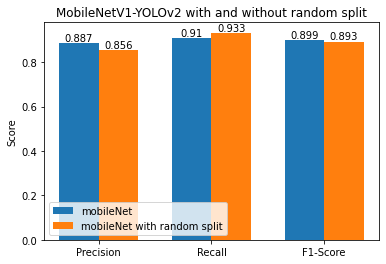

In [4]:
plot_global_metrics(mobileNetV1,mobileNetV1_split_random)

# Metrics per classes

In [2]:
dir_path = '/Users/devasou/code/deva-sou/project_ornithoScope/src/data/pickles/metrics_lab'
files = [f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/devasou/code/deva-sou/project_ornithoScope/src/data/pickles/metrics_lab'

In [214]:
def from_file_to_df(file, _columns=[]):
    file_loaded = pd.read_pickle(file)
    df_file_loaded = pd.DataFrame(file_loaded,columns=_columns)
    return df_file_loaded

def plot_PRF_global(file):
    #df = from_file_to_df(file, ['Specie','Precision','Rappel','F-score'])
    pass
    
def plot_TP_FP_FN(file, path_saving):
    # TP_FP_FN plotting
    # [{'Specie': 'MESCHA', 'TP': 15, 'FP': 15, 'FN': 1}, 
    #  {'Specie': 'SITTOR', 'TP': 0, 'FP': 0, 'FN': 0}, 
    #  {'Specie': 'MESBLE', 'TP': 0, 'FP': 0, 'FN': 4}]
    _ = from_file_to_df(file, ['Specie','TP','FP','FN'])
    print(_)
    df = _.set_index('Specie')
    task_name = file.split('/')[-1]
    ax = df.plot(kind="bar", title=f"{task_name}", figsize = (10,10))
    for container in ax.containers:
        ax.bar_label(container)
    plt.tight_layout()
    plt.savefig(f"{path_saving}/{task_name}.jpg",bbox_inches='tight',dpi=100)
    return df

def plot_PRF(file, path_saving):
    # P_R_F1_MobileNet plotting
    # [{'Specie': 'MESCHA', 'Precision': 0.763, 'Rappel': 0.987, 'F-score': 0.861}, 
    # {'Specie': 'SITTOR', 'Precision': 1.0, 'Rappel': 0.143, 'F-score': 0.25},
    _ = from_file_to_df(file, ['Specie','Precision','Rappel','F-score'])
    df = _.set_index('Specie')
    task_name = file.split('/')[-1]
    ax = df.plot(kind="bar", title=f"{task_name}", figsize = (10,10))
    for container in ax.containers:
        ax.bar_label(container)
    plt.tight_layout()
    plt.savefig(f"{path_saving}/{task_name}.jpg",bbox_inches='tight',dpi=100)
    # ../data/img_plot/metrics_lab//Users/devasou/code/deva-sou/
    # project_ornithoScope/src/data/pickles/metrics_lab/
    # P_R_F1_MobileNet_task_20211204_Orlu.p.jpg

In [215]:
def plot_all_metrics(files):
    path = f"../data/img_plot/{dir_path.split('/')[-1]}"
    if os.path.exists(path) is False:
        os.mkdir(path)
    for file in files:
        if file.startswith('P_R_F1_MobileNet'):
            pass
            #print('P_R_F1_MobileNet plotting')
            #plot_PRF(f"{dir_path}/{file}",path)
        elif file.startswith('P_R_F1_global'):
            pass
            #print('P_R_F1_global plotting')
            #plot_PRF_global(f"{dir_path}/{file}",path)
        elif file.startswith('TP_FP_FN'):
            #pass
            #print('TP_FP_FN plotting')
            plot_TP_FP_FN(f"{dir_path}/{file}",path)

    Specie   TP  FP  FN
0   MESCHA   15  12   1
1   SITTOR    0   0   0
2   MESBLE    0   0   4
3   MESNON    0   0   0
4   PINARB    0   0   0
5   ACCMOU    0   0   0
6   ROUGOR    0   0   4
7   VEREUR    0   1   0
8   MOIDOM    0   0   0
9   TOUTUR    0   0   0
10  ECUROU   30  10   1
11  PIEBAV  167  22   6
12  MULGRI    0   0   0
13  CAMPAG    0   0   0
14  MESNOI    0   0   0
15  MESHUP    0   0   0
    Specie   TP  FP  FN
0   MESCHA  455  45  33
1   SITTOR    0   0   0
2   MESBLE    0   0   0
3   MESNON    0   0   0
4   PINARB    0   0   0
5   ACCMOU    0   0   0
6   ROUGOR    0   0   0
7   VEREUR    0   3   0
8   MOIDOM    0   1   0
9   TOUTUR    0   0   0
10  ECUROU    0   3   0
11  PIEBAV    0   0   0
12  MULGRI    0   0   0
13  CAMPAG    0   0   0
14  MESNOI    0   0   0
15  MESHUP    0   0   0
    Specie  TP  FP  FN
0   MESCHA  62   3   6
1   SITTOR   0   0   0
2   MESBLE  10   5   5
3   MESNON   0   0   0
4   PINARB   3   1   3
5   ACCMOU   0   0   0
6   ROUGOR   0   0   0


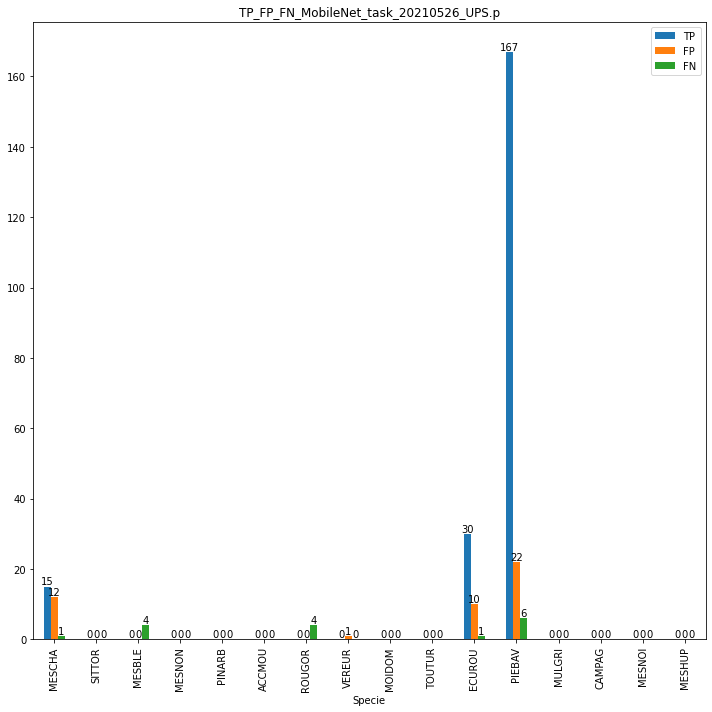

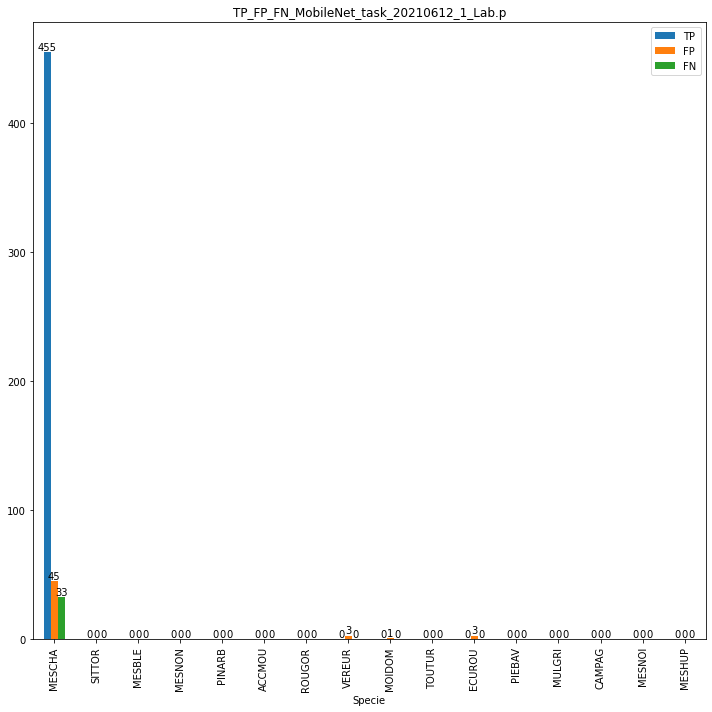

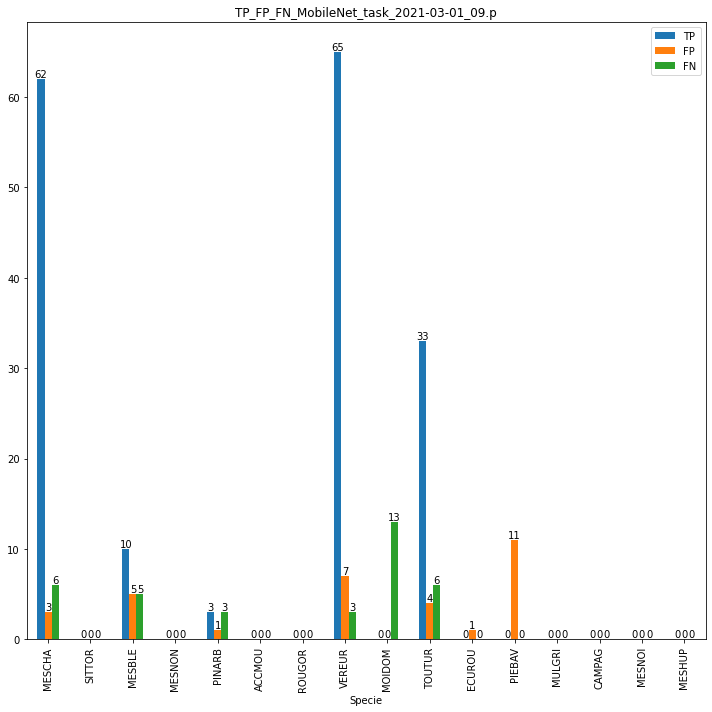

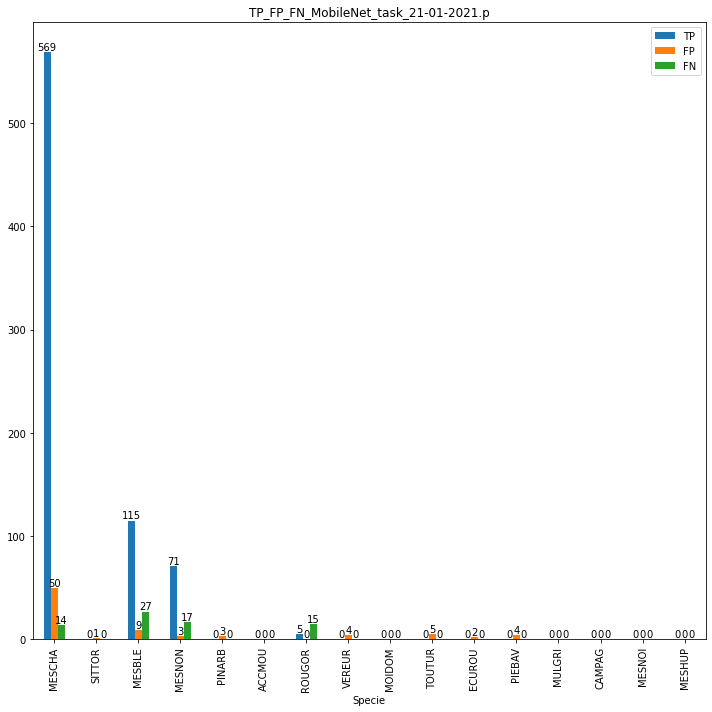

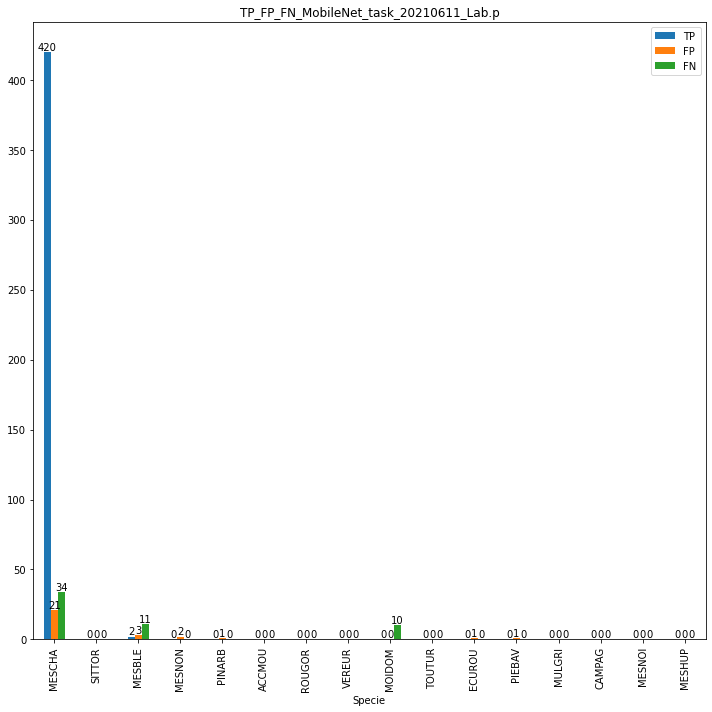

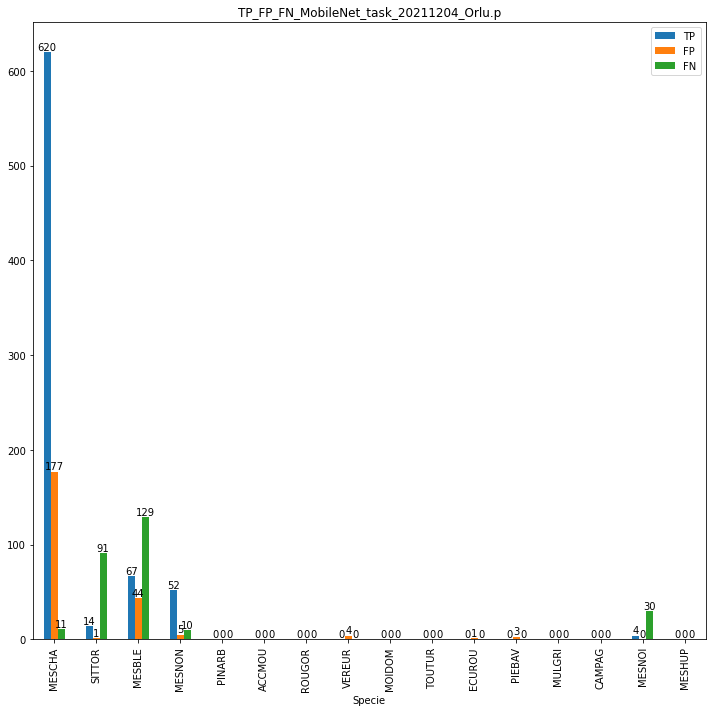

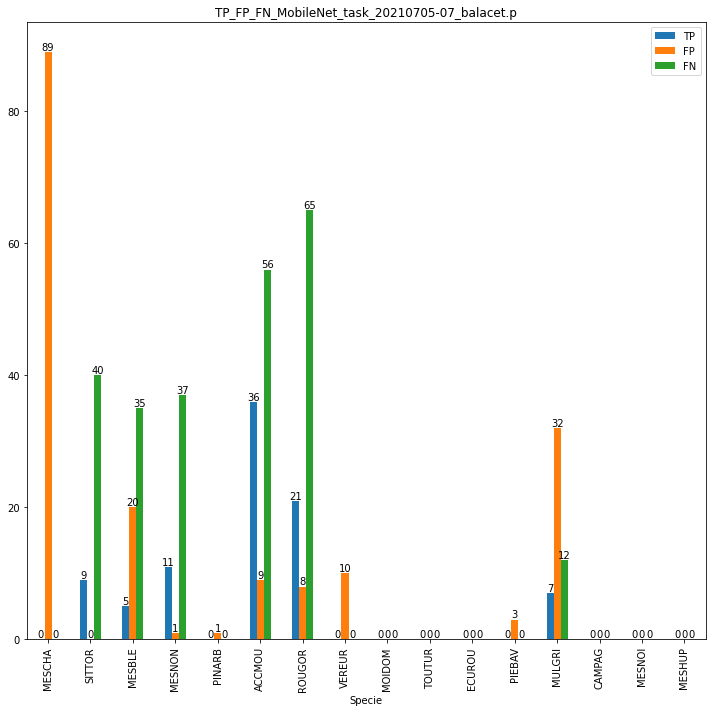

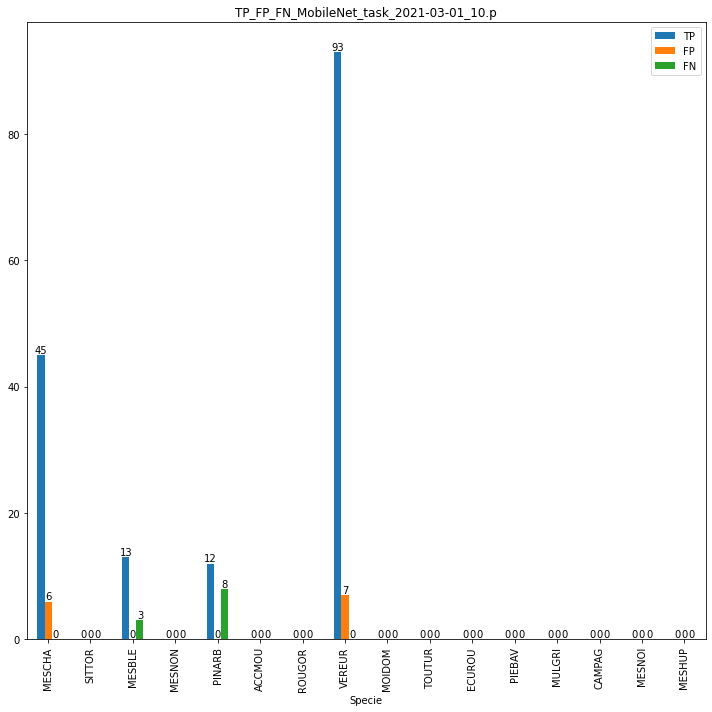

In [216]:
plot_all_metrics(files)